In [27]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())


x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import ast

# Function to extract the configuration based on model/ensemble name
def get_config_for_model(model_name, config_df):
    # Filter the DataFrame for the given model name
    #config_row = config_df[config_df['model_name'] == model_name].iloc[0]
    config_row = config_df.loc[config_df['custom_score'].idxmax()]
    #print(config_row)
    if model_name == 'ensemble1':
        config = {
            "colset": config_row['config/colset'],
            "et_bootstrap": config_row['config/et_bootstrap'],
            "et_max_depth": config_row['config/et_max_depth'],
            "et_max_features": config_row['config/et_max_features'],
            "et_min_samples_leaf": config_row['config/et_min_samples_leaf'],
            "et_min_samples_split": config_row['config/et_min_samples_split'],
            "et_n_estimators": config_row['config/et_n_estimators'],
            "lr_C": config_row['config/lr_C'],
            "lr_solver": config_row['config/lr_solver'],
            "svc_C": config_row['config/svc_C'],
            "svc_kernel": config_row['config/svc_kernel'],
            "weight_et": config_row['config/weight_et'],
            "weight_lr": config_row['config/weight_lr'],
            "weight_svc": config_row['config/weight_svc'],
            "weight_xgb": config_row['config/weight_xgb'],
            #"weight_nb": config_row['config/weight_nb'],
            "xgb_alpha": config_row['config/xgb_alpha'],
            "xgb_colsample_bytree": config_row['config/xgb_colsample_bytree'],
            "xgb_eta": config_row['config/xgb_eta'],
            "xgb_lambda": config_row['config/xgb_lambda'],
            "xgb_max_depth": config_row['config/xgb_max_depth'],
            "xgb_min_child_weight": config_row['config/xgb_min_child_weight'],
            "xgb_subsample": config_row['config/xgb_subsample']
        }
    elif model_name == 'ensemble2':
        config = {
            "colset": config_row['config/colset'],
            "et_bootstrap": config_row['config/et_bootstrap'],
            "et_max_depth": config_row['config/et_max_depth'],
            "et_max_features": config_row['config/et_max_features'],
            "et_min_samples_leaf": config_row['config/et_min_samples_leaf'],
            "et_min_samples_split": config_row['config/et_min_samples_split'],
            "et_n_estimators": config_row['config/et_n_estimators'],
            "knn_algorithm": config_row['config/knn_algorithm'],
            "knn_n_neighbors": config_row['config/knn_n_neighbors'],
            "knn_weights": config_row['config/knn_weights'],
            "lr_C": config_row['config/lr_C'],
            "lr_solver": config_row['config/lr_solver'],
            "svc_C": config_row['config/svc_C'],
            "svc_kernel": config_row['config/svc_kernel'],
            "weight_et": config_row['config/weight_et'],
            "weight_knn": config_row['config/weight_knn'],
            "weight_lr": config_row['config/weight_lr'],
            "weight_svc": config_row['config/weight_svc'],
            "weight_xgb": config_row['config/weight_xgb'],
            "xgb_alpha": config_row['config/xgb_alpha'],
            "xgb_colsample_bytree": config_row['config/xgb_colsample_bytree'],
            "xgb_eta": config_row['config/xgb_eta'],
            "xgb_lambda": config_row['config/xgb_lambda'],
            "xgb_max_depth": config_row['config/xgb_max_depth'],
            "xgb_min_child_weight": config_row['config/xgb_min_child_weight'],
            "xgb_subsample": config_row['config/xgb_subsample']
        }
    elif model_name == 'xgb':
        config = {
            "alpha": config_row['config/alpha'],
            "colsample_bytree": config_row['config/colsample_bytree'],
            "colset": config_row['config/colset'],
            "eta": config_row['config/eta'],
            "eval_metric": config_row['config/eval_metric'],
            "lambda": config_row['config/lambda'],
            "max_depth": config_row['config/max_depth'],
            "min_child_weight": config_row['config/min_child_weight'],
            "objective": config_row['config/objective'],
            "subsample": config_row['config/subsample']
        }
    elif model_name == 'rf':
        config = {
            "bootstrap": config_row['config/bootstrap'],
            "colset": config_row['config/colset'],
            "max_depth": config_row['config/max_depth'],
            "max_features": config_row['config/max_features'],
            "min_samples_leaf": config_row['config/min_samples_leaf'],
            "min_samples_split": config_row['config/min_samples_split'],
            "n_estimators": config_row['config/n_estimators']
        }
    elif model_name == 'nb':
        config = {
            "colset": config_row['config/colset']
        }
    return config


# Function to create models based on the ensemble/model name
def create_model(config, model_name):
    if model_name == 'ensemble1':
        models = [
            ('xgb', XGBClassifier(
                eta=config["xgb_eta"],
                max_depth=config["xgb_max_depth"],
                min_child_weight=config["xgb_min_child_weight"],
                subsample=config["xgb_subsample"],
                colsample_bytree=config["xgb_colsample_bytree"],
                reg_lambda=config["xgb_lambda"],
                reg_alpha=config["xgb_alpha"],
                objective="binary:logistic",
                eval_metric="logloss",
                use_label_encoder=False,
                verbosity=0
            )),
            ('et', ExtraTreesClassifier(
                n_estimators=config["et_n_estimators"],
                max_depth=config["et_max_depth"],
                min_samples_split=config["et_min_samples_split"],
                min_samples_leaf=config["et_min_samples_leaf"],
                max_features=config["et_max_features"],
                bootstrap=config["et_bootstrap"]
            )),
            ('svc', SVC(
                C=config["svc_C"],
                kernel=config["svc_kernel"],
                probability=True
            )),
            ('lr', LogisticRegression(
                C=config["lr_C"],
                solver=config["lr_solver"],
                max_iter=1000
            )),
            #('nb', GaussianNB())
        ]
        weights = [
            config["weight_xgb"],
            config["weight_et"],
            config["weight_svc"],
            config["weight_lr"],
            #config["weight_nb"]
        ]
        model = VotingClassifier(estimators=models, voting='soft', weights=weights)
    elif model_name == 'ensemble2':
        models = [
            ('xgb', XGBClassifier(
                eta=config["xgb_eta"],
                max_depth=config["xgb_max_depth"],
                min_child_weight=config["xgb_min_child_weight"],
                subsample=config["xgb_subsample"],
                colsample_bytree=config["xgb_colsample_bytree"],
                reg_lambda=config["xgb_lambda"],
                reg_alpha=config["xgb_alpha"],
                objective="binary:logistic",
                eval_metric="logloss",
                use_label_encoder=False,
                verbosity=0
            )),
            ('et', ExtraTreesClassifier(
                n_estimators=config["et_n_estimators"],
                max_depth=config["et_max_depth"],
                min_samples_split=config["et_min_samples_split"],
                min_samples_leaf=config["et_min_samples_leaf"],
                max_features=config["et_max_features"],
                bootstrap=config["et_bootstrap"]
            )),
            ('lr', LogisticRegression(
                C=config["lr_C"],
                solver=config["lr_solver"],
                max_iter=1000
            )),
            #('nb', GaussianNB())
        ]
        weights = [
            config["weight_xgb"],
            config["weight_et"],
            config["weight_lr"],
            #config["weight_nb"]
        ]
        model = VotingClassifier(estimators=models, voting='soft', weights=weights)
    elif model_name == 'xgb':
        model = XGBClassifier(
            eta=config["eta"],
            max_depth=config["max_depth"],
            min_child_weight=config["min_child_weight"],
            subsample=config["subsample"],
            colsample_bytree=config["colsample_bytree"],
            reg_lambda=config["lambda"],
            reg_alpha=config["alpha"],
            objective=config["objective"],
            eval_metric=config["eval_metric"],
            use_label_encoder=False,
            verbosity=0
        )
    elif model_name == 'rf':
        model = ExtraTreesClassifier(
            n_estimators=config["n_estimators"],
            max_depth=config["max_depth"],
            min_samples_split=config["min_samples_split"],
            min_samples_leaf=config["min_samples_leaf"],
            max_features=config["max_features"],
            bootstrap=config["bootstrap"]
        )
    elif model_name == 'nb':
        model = GaussianNB()
    return model

# Function to train the model and calculate custom score
def train_and_evaluate_model(config, X, y, model_name):
    vars = ast.literal_eval(config['colset'])
    Xloc = X[vars]
    
    # Split data into training and validation sets without a fixed random seed
    X_train, X_val, y_train, y_val = train_test_split(Xloc, y, test_size=0.2)
    
    # Create the model
    model = create_model(config, model_name)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities on the validation set
    if hasattr(model, 'predict_proba'):
        preds_proba = model.predict_proba(X_val)[:, 1]
    else:
        preds_proba = model.decision_function(X_val)
    
    # Get the indices of the top 20% predictions
    top_20_percent_indices = np.argsort(preds_proba)[-int(0.2 * len(preds_proba)):]

    # Select the corresponding true labels and predicted labels for top 20%
    top_20_true = y_val.iloc[top_20_percent_indices].values
    top_20_preds = (preds_proba[top_20_percent_indices] >= 0.5).astype(int)
    
    # Calculate the number of correct class 1 predictions
    correct_class_1_predictions = sum(1 for true, pred in zip(top_20_true, top_20_preds) if true == 1 and pred == 1)
    
    # Calculate the number of features used
    num_features_used = Xloc.shape[1]

    # Scaled score calculation
    customer_scaled = (correct_class_1_predictions / len(top_20_preds)) * 1000
    customer_gain = 10 * customer_scaled
    variable_cost = 200 * num_features_used
    custom_score = customer_gain - variable_cost

    return custom_score

# Load the results from the CSV file
#results = pd.read_csv('results.csv')

df_e1 = pd.read_csv('ensemble1-raytune-bohb.csv')
df_e2 = pd.read_csv('ensemble2-raytune-bohb.csv')
df_xgb= pd.read_csv('xgb-raytune-bohb.csv')
df_rf = pd.read_csv('rf-raytune_bohb.csv')
df_nb = pd.read_csv('nb-raytune_bohb.csv')

# Initialize a list to store the results
comparison_results = []

# Number of iterations for resampling and evaluating
n_iterations = 200

# Define the models and ensembles to compare
model_names = ['xgb', 'rf', 'nb', 'ensemble1', 'ensemble2']

# Run the loop for the specified number of iterations
for i in range(n_iterations):
    # if i % 10 == 0:
    #     print(f"Iteration {i + 1}")
    for model_name in model_names:
        # Get the configuration for the model
        config = get_config_for_model(model_name, config_df=df_e1 if model_name == 'ensemble1' else df_e2 if model_name == 'ensemble2' else df_xgb if model_name == 'xgb' else df_rf if model_name == 'rf' else df_nb)
        
        # Train and evaluate the model
        custom_score = train_and_evaluate_model(config, X, y, model_name)
        
        # Append the results to the list
        comparison_results.append({
            'custom_score': custom_score,
            'model_name': model_name,
            'iteration': i + 1
        })

# Convert the results to a DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Save the comparison results to a CSV file
comparison_df.to_csv('comparison_results.csv', index=False)

# Display the comparison results
print(comparison_df)


d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\mgr\aml\pr2\venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

     custom_score model_name  iteration
0          6400.0        xgb          1
1          6950.0         rf          1
2          6700.0         nb          1
3          7000.0  ensemble1          1
4          7000.0  ensemble2          1
..            ...        ...        ...
995        6550.0        xgb        200
996        6800.0         rf        200
997        7200.0         nb        200
998        7100.0  ensemble1        200
999        6900.0  ensemble2        200

[1000 rows x 3 columns]


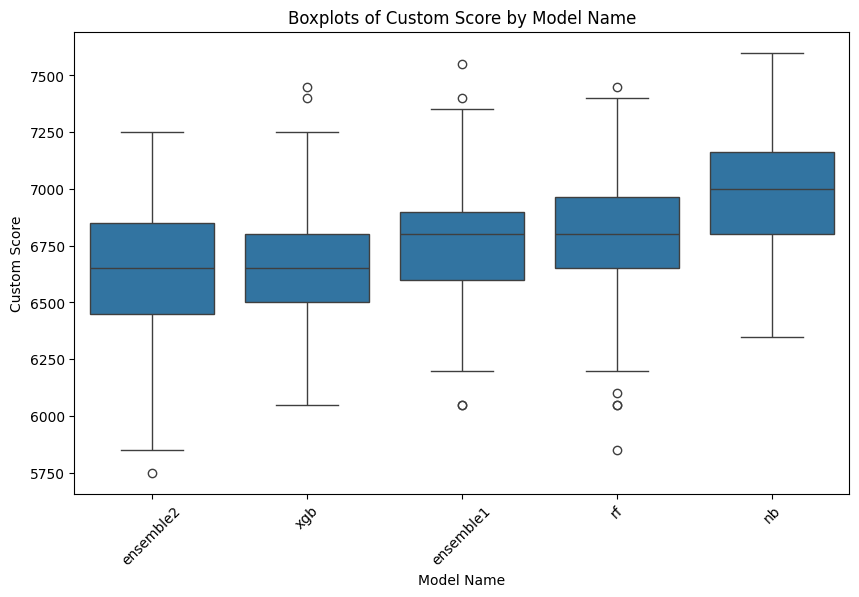

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'model_name' and calculate the custom_score median
grouped_data = comparison_df.groupby('model_name')['custom_score'].median().reset_index()

# Sort the data by median custom_score
sorted_data = grouped_data.sort_values('custom_score')

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='model_name', y='custom_score', order=sorted_data['model_name'])
plt.xlabel('Model Name')
plt.ylabel('Custom Score')
plt.title('Boxplots of Custom Score by Model Name')
plt.xticks(rotation=45)
plt.show()